In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# redistribute the unbalanced data with over sampling
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix

# display progress of loops
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('../input/microbes-dataset/microbes.csv')

# ***1. EDA***

In [4]:
df.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [5]:
df.tail()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
30522,30522,3.01,22.6,4.90,20.0,0.4340,1.40,19.90,22.1,18.1,...,18.6,4.350,1.350,1.710,0.5490,19.1,13.2,1.070,7.15,Ulothrix
30523,30523,5.19,22.6,2.07,19.4,0.0788,1.67,5.09,22.8,19.2,...,20.0,1.460,0.411,0.458,0.0597,19.8,17.2,0.197,7.15,Ulothrix
30524,30524,9.21,22.7,2.07,21.0,0.0790,5.81,12.70,22.8,20.1,...,20.1,1.060,0.257,0.319,0.0341,20.7,11.6,0.198,7.15,Ulothrix
30525,30525,8.21,22.6,1.87,20.5,0.0641,5.96,11.30,22.8,20.2,...,20.2,1.010,0.285,0.350,0.0314,20.8,20.4,0.162,7.15,Ulothrix
30526,30526,6.57,21.0,2.13,21.2,0.0840,3.77,16.50,22.8,20.7,...,20.8,0.969,0.642,0.385,0.0502,21.0,18.4,0.208,7.15,Ulothrix


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30527 non-null  int64  
 1   Solidity         30527 non-null  float64
 2   Eccentricity     30527 non-null  float64
 3   EquivDiameter    30527 non-null  float64
 4   Extrema          30527 non-null  float64
 5   FilledArea       30527 non-null  float64
 6   Extent           30527 non-null  float64
 7   Orientation      30527 non-null  float64
 8   EulerNumber      30527 non-null  float64
 9   BoundingBox1     30527 non-null  float64
 10  BoundingBox2     30527 non-null  float64
 11  BoundingBox3     30527 non-null  float64
 12  BoundingBox4     30527 non-null  float64
 13  ConvexHull1      30527 non-null  float64
 14  ConvexHull2      30527 non-null  float64
 15  ConvexHull3      30527 non-null  float64
 16  ConvexHull4      30527 non-null  float64
 17  MajorAxisLen

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.iloc[:,:13].describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,2.085481,2.640499,11.113760
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,2.166312,2.488448,6.033357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,0.849000,1.150000,5.980000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,1.500000,1.940000,11.100000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,2.660000,3.380000,16.000000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


In [9]:
df.iloc[:,13:].describe()

,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,11.113760,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,6.033357,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.980000,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,11.100000,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,16.000000,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


# ***2. Data Visualization***

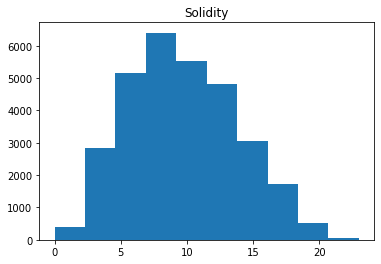

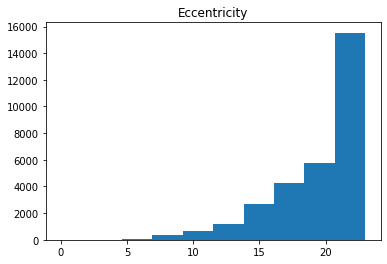

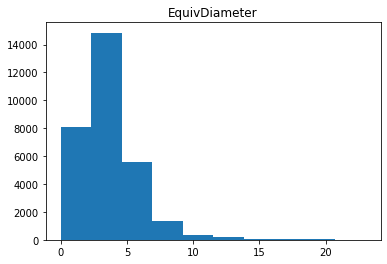

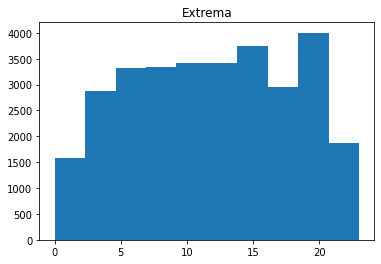

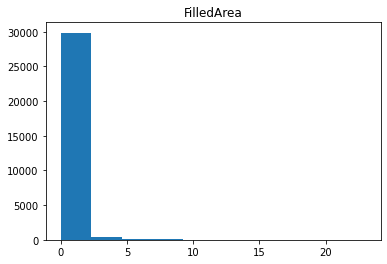

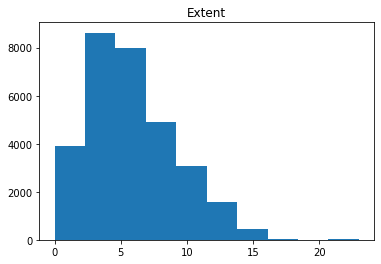

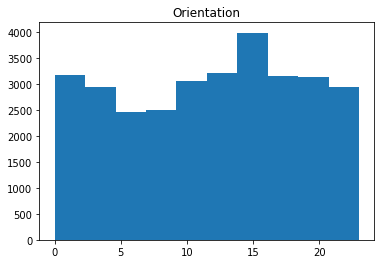

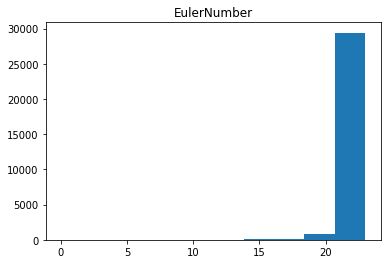

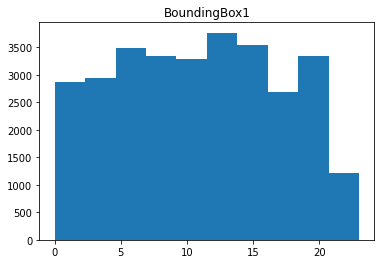

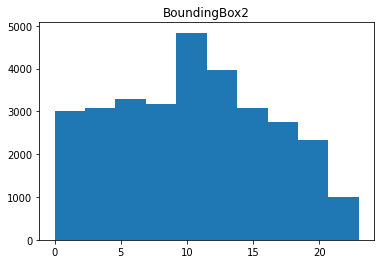

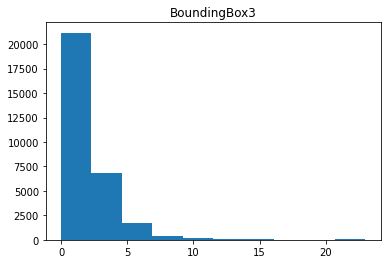

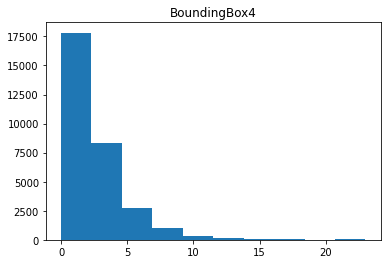

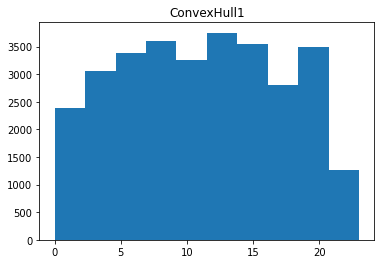

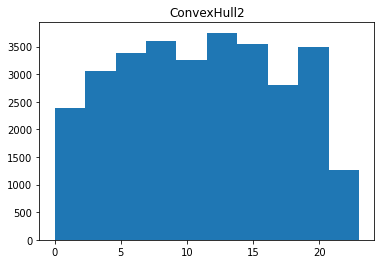

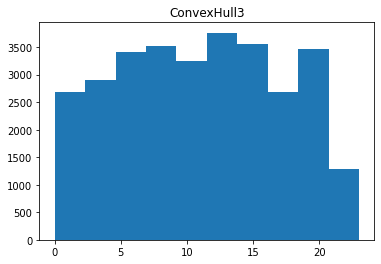

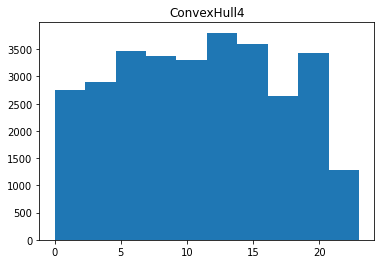

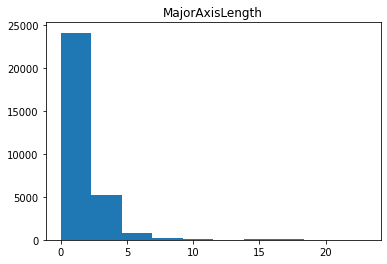

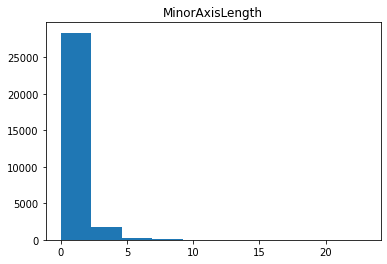

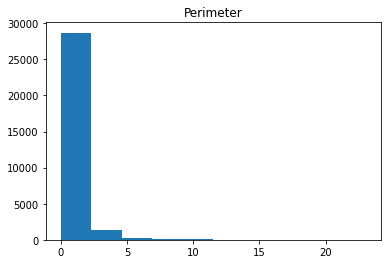

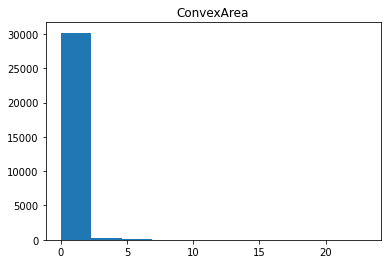

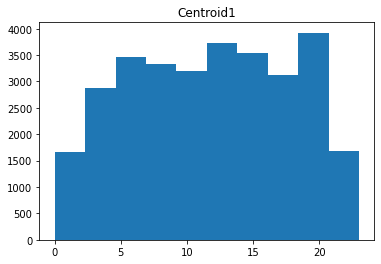

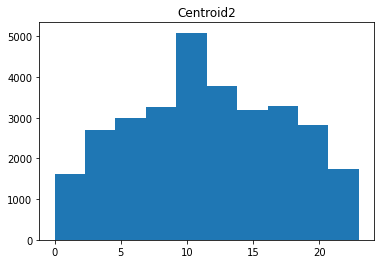

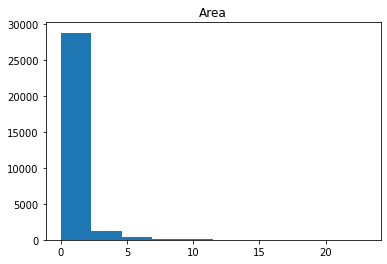

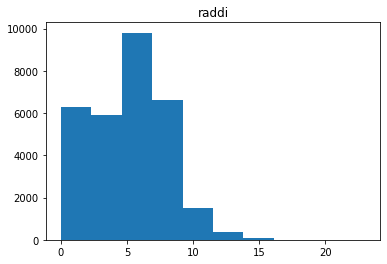

In [10]:
for col in df.columns[:-1]:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [11]:
labels = df['microorganisms'].unique()
label_counts = df.groupby(['microorganisms']).size()
labels.sort()

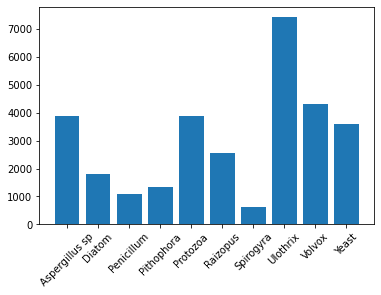

In [12]:
plt.bar(labels, label_counts)
plt.xticks(rotation=45)
plt.show()

## Analyzing the data distribution
* The dataset is imbalanced, which means some labels will hold more weight than others when predicting labels
* Two solutions are:
 * undersample - remove data points from the oversaturated labels
 * oversample - duplicate existing data points from the smaller distributions
* For our purposes, we want to avoid undersampling because that will lead to information loss
    * instead, we will use a method called SMOTE, which is a variation of oversampling ( More on this later )

# ***3. Data Preprocessing***

## Outlier Detection and Removal
* Since SMOTE duplicates random samples of our data, we must first remove any outliers before they influence our model predictions.
* Credit to ***Elena Ignat*** for the outlier detection idea.
    * Elena's Notebook: https://www.kaggle.com/code/elenasm/outliers-detection
* For columns with normal distributions:
    * Calculate the outlier threshold to be anything greater than 3 std dev within each column and remove them
        * Link: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe 
* Problem: Not all of the columns follow a normal distribution
    * We need to first convert all the features into normal distributions using Sklearn.Preprocessing.StandardScaler
        * Link: https://stackoverflow.com/questions/60785109/normalization-vs-scaling-for-not-normal-distribution-in-scikit-learn

## Normalize the Data

In [13]:
scaler = StandardScaler()
sc_df = scaler.fit_transform(df.iloc[:,:-1])
temp_y = df['microorganisms'].to_numpy()
sc_df = pd.DataFrame(np.hstack((sc_df, temp_y.reshape(-1, 1))), columns=df.columns)
sc_df.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0.251578,-1.053782,0.812665,-1.343554,0.417081,0.707294,-1.460182,-0.084019,-1.304578,0.086349,...,-1.322303,-0.159493,0.48666,-0.127081,-0.061375,-1.347138,0.09573,0.433369,0.989394,Spirogyra
1,-1.003537,-0.335344,0.22917,-0.94488,-0.06402,-0.716907,1.041639,0.123689,-0.90413,1.518112,...,-0.911751,-0.051223,0.413149,0.156737,-0.040778,-0.952423,1.586816,-0.032279,0.989394,Spirogyra
2,-0.334142,0.095719,0.450808,-0.862167,-0.005739,0.002884,1.406646,0.019835,-0.813865,-0.034402,...,-0.831283,0.014942,0.298798,0.243532,-0.074763,-0.862865,-0.009523,0.128348,0.989394,Spirogyra
3,0.103918,-0.450294,1.653984,-0.12768,1.19987,0.141305,-0.275429,-0.499435,-0.346129,0.051849,...,-0.351759,0.261557,0.903223,-0.099307,0.119878,-0.24094,0.078188,1.313402,0.989394,Spirogyra
4,-0.838649,0.210669,7.448229,-0.19385,16.318547,-0.57541,-1.394785,-10.884831,-0.118005,-1.583466,...,-0.134987,3.714168,4.243891,5.182143,4.310322,0.372694,-0.351596,14.351559,0.989394,Spirogyra


In [14]:
sc_df = sc_df[(np.abs(stats.zscore(df.iloc[:,:-1])) < 3).all(axis=1)]

In [15]:
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28772 entries, 0 to 30526
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Solidity         28772 non-null  object
 1   Eccentricity     28772 non-null  object
 2   EquivDiameter    28772 non-null  object
 3   Extrema          28772 non-null  object
 4   FilledArea       28772 non-null  object
 5   Extent           28772 non-null  object
 6   Orientation      28772 non-null  object
 7   EulerNumber      28772 non-null  object
 8   BoundingBox1     28772 non-null  object
 9   BoundingBox2     28772 non-null  object
 10  BoundingBox3     28772 non-null  object
 11  BoundingBox4     28772 non-null  object
 12  ConvexHull1      28772 non-null  object
 13  ConvexHull2      28772 non-null  object
 14  ConvexHull3      28772 non-null  object
 15  ConvexHull4      28772 non-null  object
 16  MajorAxisLength  28772 non-null  object
 17  MinorAxisLength  28772 non-null

## Oversampling with SMOTE (Synthetic Minority Oversampling Technique)
* More on this here: https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [16]:
X = sc_df.drop(['microorganisms'], axis=1).to_numpy()
y = sc_df['microorganisms'].to_numpy()
sm = SMOTE(random_state=42)
X_train_transformed, y_train_transformed = sm.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    shuffle=True)

# ***4. Baseline Models***

In [18]:
# format scoring output
def score_format(model):
    print(f'Accuracy: {round(model * 100, 2)} %')

## K-Nearest Neighbors

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_format(knn.score(X_test, y_test))

Accuracy: 92.04 %


## Random Forest

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
score_format(rf.score(X_test, y_test))

Accuracy: 98.39 %


## Gradient Boosting

In [21]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
score_format(gb.score(X_test, y_test))

Accuracy: 87.07 %


## Multi-Layer Perceptron

In [22]:
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train, y_train)
score_format(mlp.score(X_test, y_test))

Accuracy: 84.07 %


# ***5. Cross Validation*** 

## Overfit?
* Since we're using SMOTE, we'll be duplicating underrepresented data and this may affect our accuracy
    * Model accuracies suffer from overfitting when models pay too much attention to certain data points during training and cannot predict effectively on unseen points
* Cross validation will allow us to determine how well each model generalizes on unseen data
    * Cross validation will treat the entire dataset as a training AND test set by splitting into K equal parts, and alternating training/test sets among those K-splits

In [23]:
models = [knn, rf, gb, mlp]

In [24]:
for model in models:
    scores = cross_val_score(estimator=model,
                         X=X,
                         y=y,
                         cv=10,
                         n_jobs=-1)
    print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV accuracy: 0.934 +/- 0.014
CV accuracy: 0.995 +/- 0.006
CV accuracy: 0.814 +/- 0.030
CV accuracy: 0.813 +/- 0.036


## CV Scores
* KNN: 
    * CV accuracy: 0.934 +/- 0.014
* Random Forest: 
    * CV accuracy: 0.995 +/- 0.006
* Gradient Boosting: 
    * CV accuracy: 0.814 +/- 0.030
* MLP: 
    * CV accuracy: 0.811 +/- 0.026

## What's next?
* Random Forest is the best predictor with the highest accuracy and the lowest score std dev, while Gradient Boosting and MLP are the worst... Done, right?
* The validation shows that the random forest model generalized very well.
    * *However*, the above models are baseline models, so we'll need to optimize them to improve performance.

# ***6. Hyperparameter Tuning*** 

## GridSearchCV
* Hyperparameters are nontrainable configurations that determines how models learn from data.
    * i.e., learning rate in perceptrons, limiting the depth in decision trees, choosing optimizers, etc.
* You may have some intuitive sense for why certain settings are appropriate for training; however, experimenting every combination is cumbersome.
* Thankfully, Grid Search will find the best estimator within your parameters and cross validate your results as well
* Docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [25]:
ints_ = [5,7,9, None]
param_grid = [{'n_neighbors': ints_[:-1], 
               'weights': ['uniform', 'distance']
              },
              {'criterion': ['gini', 'entropy'],
               'max_depth': ints_
              },
              {'max_depth': ints_[:-1]},
              {'hidden_layer_sizes': [(100,), (250,)], 
               'activation': ['logistic', 'tanh', 'relu'],
               'max_iter': [10000]
              }]

tuned_models = []
for i in tqdm(range(len(models))):    
    gs = GridSearchCV(models[i], 
                      param_grid[i], 
                      n_jobs = -1,
                      refit = True,
                      cv = 10,
                      return_train_score = True)
    best_model = gs.fit(X, y)
    tuned_models.append(best_model)

100%|██████████| 4/4 [2:51:26<00:00, 2571.61s/it]


In [26]:
tuned_models

[GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
              param_grid={'n_neighbors': [5, 7, 9],
                          'weights': ['uniform', 'distance']},
              return_train_score=True),
 GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 7, 9, None]},
              return_train_score=True),
 GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
              param_grid={'max_depth': [5, 7, 9]}, return_train_score=True),
 GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
              param_grid={'activation': ['logistic', 'tanh', 'relu'],
                          'hidden_layer_sizes': [(100,), (250,)],
                          'max_iter': [10000]},
              return_train_score=True)]

In [27]:
for model in tuned_models:
    print(f'Best Params: {model.best_estimator_}')
    print(f'Best Score: {model.best_score_:.3f}')
    print()
    print()

Best Params: KNeighborsClassifier(weights='distance')
Best Score: 0.995


Best Params: RandomForestClassifier()
Best Score: 0.995


Best Params: GradientBoostingClassifier(max_depth=9)
Best Score: 0.995


Best Params: MLPClassifier(activation='logistic', hidden_layer_sizes=(250,), max_iter=10000)
Best Score: 0.991


